## Homework 3: Imbalanced Datasets

### Instructions:
Please upload the *.ipynb* AND *.pdf* to Gradescope prior to the deadline (10/31). Submission on Courseworks/Canvas is **not** required, and won't be accepted.

Please name your soltution file in the following format - AML_HW3_Solutions_(YOUR_UNI)


### GIST:
The goal of this assignment is to build a model that can reliably predict the fraudulent transactions from a Credit Card fraud dataset. You will notice that, without much effort, you can build a model that gives you a very high ‘accuracy’ score. However, this metric is misleading since the model cannot correctly classify instances of the minority class (‘1’ in this case). This can be attributed to the  inherent imbalance present in the target column of the dataset.  

To solve this issue, you will need to employ certain ML techniques that are designed to counter class imbalance. Hence, the focus of this assignment will be towards addressing class imbalance and testing the model using different evaluation metrics other than just accuracy.

## Name:  

## UNI:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import below any other packages you need for your solution

In [2]:
#libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, roc_curve,classification_report, ConfusionMatrixDisplay
import imblearn
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [3]:
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **1. Examining Class Imbalance.**

a. Examine the class imbalance in the target column. What is its class distribution? Show this information visually using an appropriate scale. </br>
b. What is the degree of imbalance? (Mild/Moderate/Extreme)

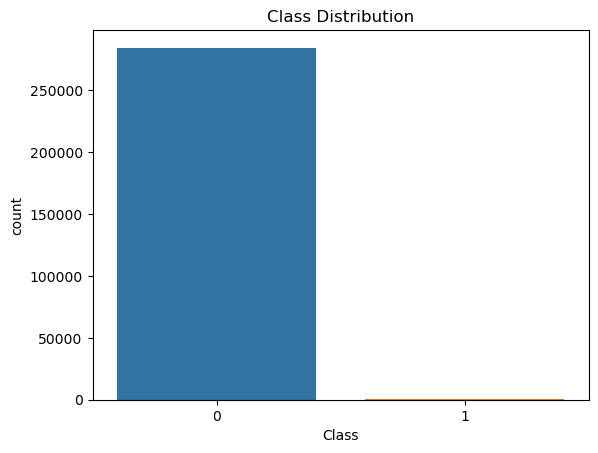

In [4]:
#Your code here

sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [5]:
#Your code here

# Extreme

### **2. Pre-processing**

The raw data has a few issues. <br>
Since we are unsure what the time column actually means so drop the Time column.
The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range. <br>

The below is already done for you.

In [6]:
# You don't want the 'Time' column. Pop it off
df.pop('Time')

# The 'Amount' column covers a huge range. Convert it to log-space.
eps = 0.001
df['Log Amount'] = np.log(df.pop('Amount') + eps)

a. Split the dataset into development and test sets. What splitting methodology did you choose, and why? </br>
b. Scale numerical columns. </br>
c. Print the shape of the development and test set.

In [7]:
#Your code here

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# The stratified method is choosen because the dataset is imbalanced.

In [8]:
#Your code here

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#Your code here

print(f"Scaled training set shape: {X_train_scaled.shape}, Scaled test set shape: {X_test_scaled.shape}")

Scaled training set shape: (227845, 29), Scaled test set shape: (56962, 29)


### 3.1 Default Dataset
Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation </br>

In [10]:
#Your Code Here

clf_default = DecisionTreeClassifier(max_depth=10, random_state=42)
cv_results_default = cross_validate(clf_default, X_train_scaled, y_train, cv=5, scoring=['roc_auc', 'average_precision'])

print(f"AUC (5-fold CV): {cv_results_default['test_roc_auc'].mean()}")
print(f"Average Precision (5-fold CV): {cv_results_default['test_average_precision'].mean()}")

AUC (5-fold CV): 0.8359524571279693
Average Precision (5-fold CV): 0.641744070059615


### 3.2 Balanced Weight

a. Here, we are going to use a 'balanced' decision tree clasifier on the same dataset. Use max_depth=10 and random_state=42, and then print the AUC and Average Precision values of 5 Fold Cross Validation.

In [11]:
#Your Code Here

clf_balanced = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
cv_results_balanced = cross_validate(clf_balanced, X_train_scaled, y_train, cv=5, scoring=['roc_auc', 'average_precision'])

print(f"AUC (5-fold CV): {cv_results_balanced['test_roc_auc'].mean()}")
print(f"Average Precision (5-fold CV): {cv_results_balanced['test_average_precision'].mean()}")

AUC (5-fold CV): 0.905514887383234
Average Precision (5-fold CV): 0.5236357414975382


### 3.3 Random Oversampling

a. Perform random oversampling on the development dataset. (Please set random state to 42 while doing this).
Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [12]:
#Your Code Here

ros = RandomOverSampler(random_state=42)
X_train_oversample, y_train_oversample = ros.fit_resample(X_train_scaled, y_train)

In [13]:
#Your Code Here

clf_oversample = DecisionTreeClassifier(max_depth=10, random_state=42)
cv_results_oversample = cross_validate(imb_make_pipeline(ros, clf_oversample), X_train_scaled, y_train, cv=5, scoring=['roc_auc', 'average_precision'])

print(f"AUC (5-fold CV): {cv_results_oversample['test_roc_auc'].mean()}")
print(f"Average Precision (5-fold CV): {cv_results_oversample['test_average_precision'].mean()}")

AUC (5-fold CV): 0.8962802947061006
Average Precision (5-fold CV): 0.5167581570430926


### 3.4 Random Undersampling

a. Perform random undersampling on the development dataset. (Please set random state to 42 while doing this).
Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [14]:
#Your Code Here

rus = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train_scaled, y_train)

In [15]:
#Your Code Here

clf_undersample = DecisionTreeClassifier(max_depth=10, random_state=42)
cv_results_undersample = cross_validate(imb_make_pipeline(rus, clf_undersample), X_train_scaled, y_train, cv=5, scoring=['roc_auc', 'average_precision'])

print(f"AUC (5-fold CV): {cv_results_undersample['test_roc_auc'].mean()}")
print(f"Average Precision (5-fold CV): {cv_results_undersample['test_average_precision'].mean()}")

AUC (5-fold CV): 0.9072986098829894
Average Precision (5-fold CV): 0.01655060014804277


### 3.5 SMOTE

a. Perform Synthetic Minority Oversampling Technique (SMOTE) on the development dataset. (Please set random state to 42 while doing this). Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [16]:
#Your Code Here

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [17]:
#Your Code Here

clf_smote = DecisionTreeClassifier(max_depth=10, random_state=42)
smote_cv_results = cross_validate(imb_make_pipeline(smote, clf_smote), X_train_scaled, y_train, cv=5, scoring=['roc_auc', 'average_precision'])

print(f"AUC (5-fold CV): {smote_cv_results['test_roc_auc'].mean()}")
print(f"Average Precision (5-fold CV): {smote_cv_results['test_average_precision'].mean()}")

AUC (5-fold CV): 0.9023022248050829
Average Precision (5-fold CV): 0.4705691055171962


### 3.6 Visual Comparison

Prepare a plot comparing the class distribtion of the target column for each of the imbalance techiques used above. Use the default class split as well.

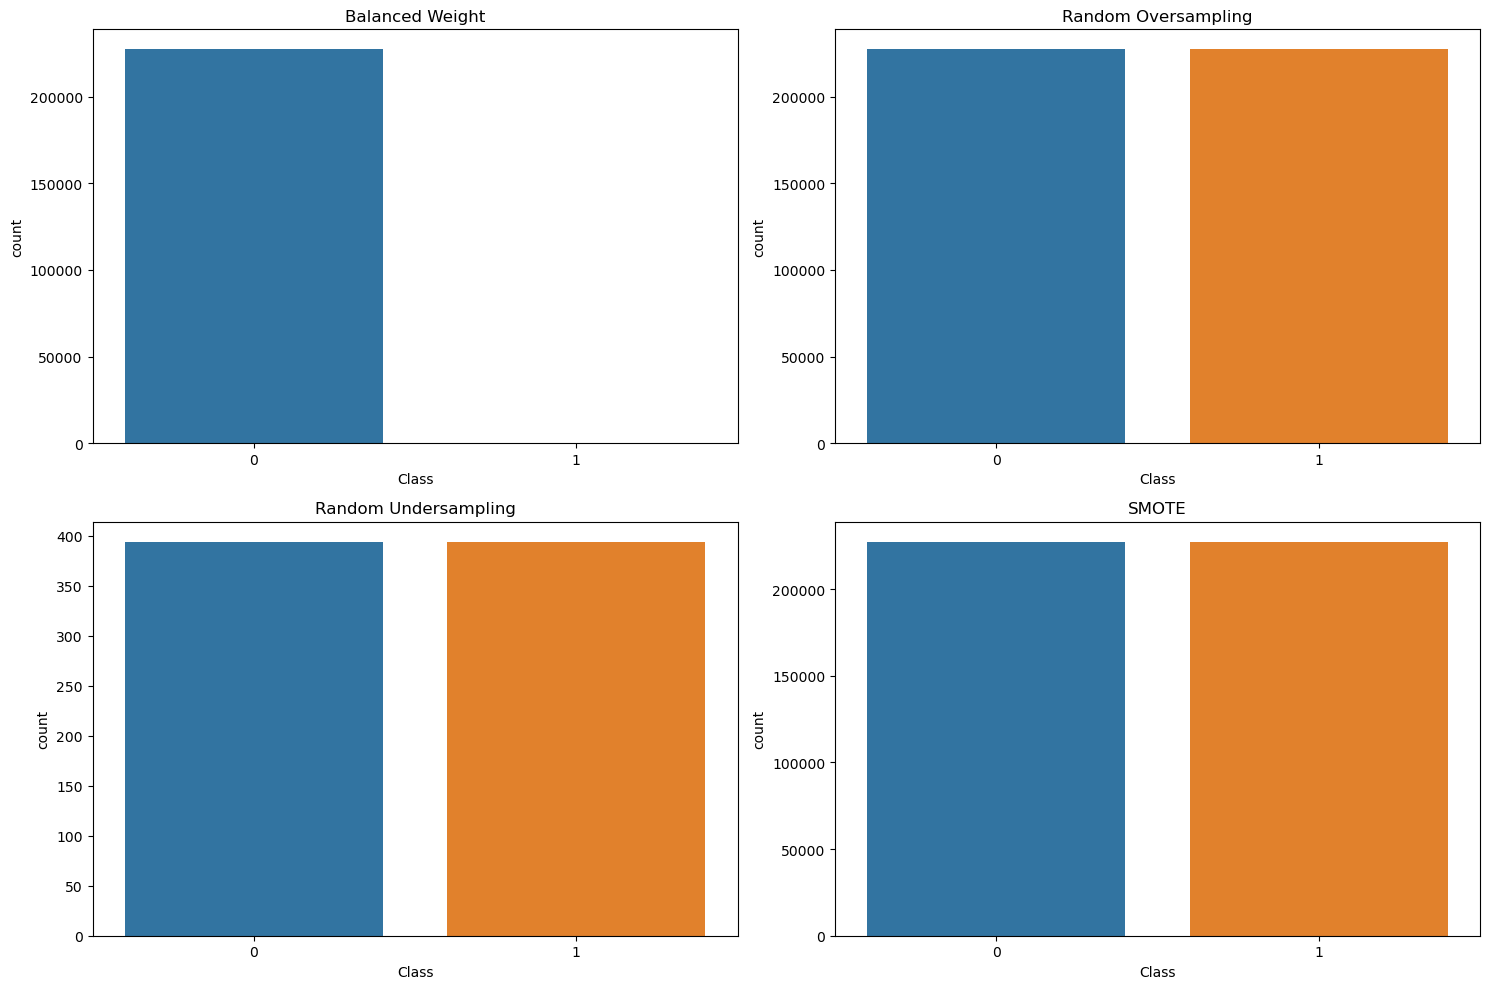

In [18]:
#Your Code Here

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x=y_train)  # No resampling, so it's the same as original
plt.title('Balanced Weight')

plt.subplot(2, 2, 2)
sns.countplot(x=y_train_oversample)
plt.title('Random Oversampling')

plt.subplot(2, 2, 3)
sns.countplot(x=y_train_undersample)
plt.title('Random Undersampling')

plt.subplot(2, 2, 4)
sns.countplot(x=y_train_smote)
plt.title('SMOTE')

plt.tight_layout()
plt.show()

### **4.1: Model Prediction & Evaluation - AUC Scores**
Make predictions on the test set using the five models that you built and report their AUC values<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight). Did the models with high AUC scores on the development set exhibit similar performance on the test set? Explain.

In [19]:
#Your Code Here

clf_default.fit(X_train_scaled, y_train)
clf_oversample.fit(X_train_oversample, y_train_oversample)
clf_undersample.fit(X_train_undersample, y_train_undersample)
clf_smote.fit(X_train_smote, y_train_smote)
clf_balanced.fit(X_train_scaled, y_train)

y_pred_default = clf_default.predict_proba(X_test_scaled)[:, 1]
y_pred_oversample = clf_oversample.predict_proba(X_test_scaled)[:, 1]
y_pred_undersample = clf_undersample.predict_proba(X_test_scaled)[:, 1]
y_pred_smote = clf_smote.predict_proba(X_test_scaled)[:, 1]
y_pred_balanced = clf_balanced.predict_proba(X_test_scaled)[:, 1]

auc_default = roc_auc_score(y_test, y_pred_default)
auc_oversample = roc_auc_score(y_test, y_pred_oversample)
auc_undersample = roc_auc_score(y_test, y_pred_undersample)
auc_smote = roc_auc_score(y_test, y_pred_smote)
auc_balanced = roc_auc_score(y_test, y_pred_balanced)

print(f"Default AUC: {auc_default}")
print(f"Random Oversampling AUC: {auc_oversample}")
print(f"Random Undersampling AUC: {auc_undersample}")
print(f"SMOTE AUC: {auc_smote}")
print(f"Balanced Weight AUC: {auc_balanced}")

# Yes, basically the model that performs well on development set exhibit similar performance. It is because
# we use validation performance on development set which simulate test performance.

Default AUC: 0.8196316775866227
Random Oversampling AUC: 0.9016732009348478
Random Undersampling AUC: 0.8959979162599198
SMOTE AUC: 0.8752678248423735
Balanced Weight AUC: 0.9017402244381152


### **4.2: Model Prediction & Evaluation - Confusion Matrix**
a. Plot Confusion Matrices for all the five models on the test set. Comment on your results and share in detail. Consider precision, recall and f1 scores. <br>
b. For the dataset at hand, which evaluation metric matters most according to you? Would it make sense to prioritise either precision/recall over the other? Justify.

Default Model - Classification Report


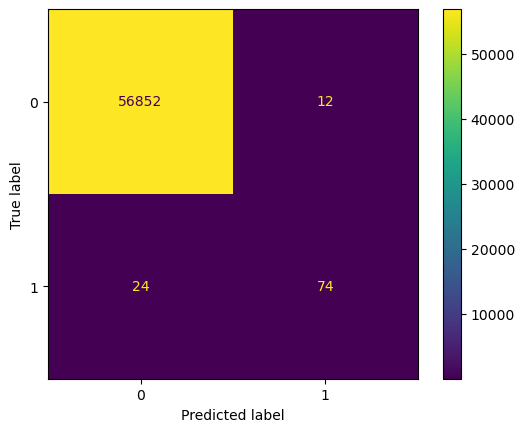

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.76      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
#Your Code Here

y_pred_default = clf_default.predict(X_test_scaled)
cm_default = confusion_matrix(y_test, y_pred_default)
print("Default Model - Classification Report")
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=clf_default.classes_)
disp1.plot()
plt.show()
print(classification_report(y_test, y_pred_default))

Oversampling Model - Classification Report


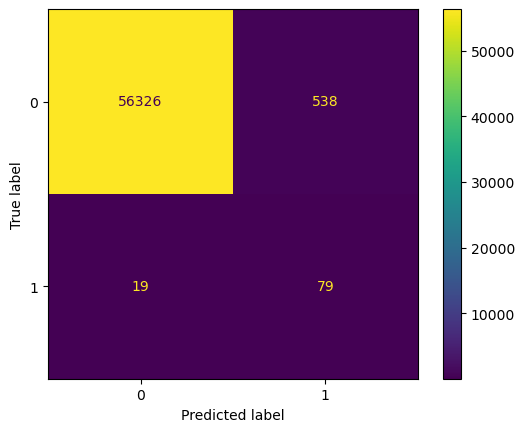

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.13      0.81      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.90      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [27]:
#Your Code Here

y_pred_oversample = clf_oversample.predict(X_test_scaled)
cm_oversample = confusion_matrix(y_test, y_pred_oversample)
print("Oversampling Model - Classification Report")
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_oversample, display_labels=clf_oversample.classes_)
disp2.plot()
plt.show()
print(classification_report(y_test, y_pred_oversample))

Undersampling Model - Classification Report


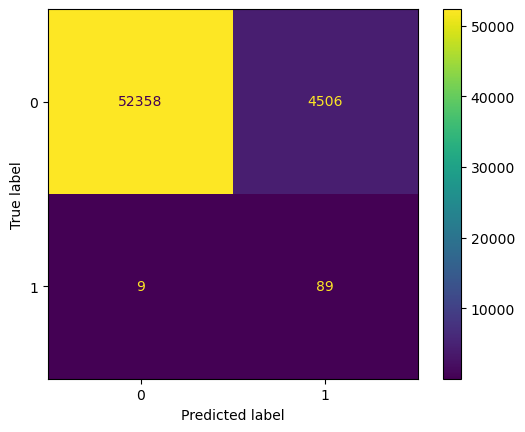

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.91      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.91      0.50     56962
weighted avg       1.00      0.92      0.96     56962



In [24]:
#Your Code Here

y_pred_undersample = clf_undersample.predict(X_test_scaled)
cm_undersample = confusion_matrix(y_test, y_pred_undersample)
print("Undersampling Model - Classification Report")
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_undersample, display_labels=clf_undersample.classes_)
disp3.plot()
plt.show()
print(classification_report(y_test, y_pred_undersample))

Smote Model - Classification Report


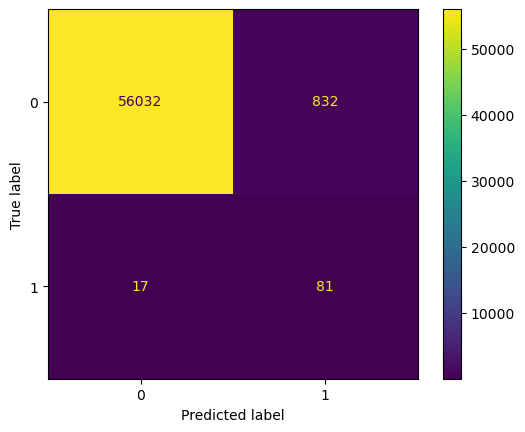

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.91      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.91      0.50     56962
weighted avg       1.00      0.92      0.96     56962



In [28]:
#Your Code Here

cm_smote = confusion_matrix(y_test, clf_smote.predict(X_test_scaled))
print("Smote Model - Classification Report")
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=clf_smote.classes_)
disp4.plot()
plt.show()
print(classification_report(y_test, y_pred_undersample))

Balanced Weight Model - Classification Report


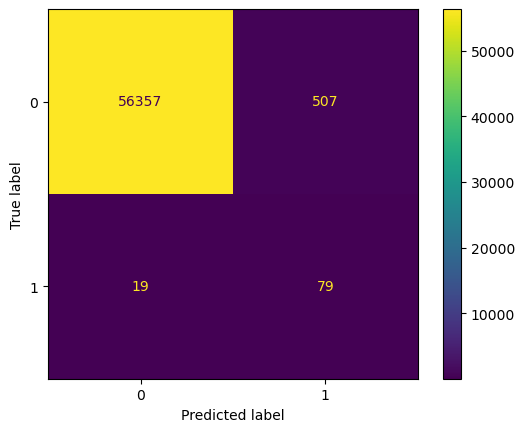

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.91      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.91      0.50     56962
weighted avg       1.00      0.92      0.96     56962



In [29]:
#Your Code Here
cm_balanced = confusion_matrix(y_test, clf_balanced.predict(X_test_scaled))
print("Balanced Weight Model - Classification Report")
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=clf_balanced.classes_)
disp5.plot()
plt.show()
print(classification_report(y_test, y_pred_undersample))

In [35]:
#Comment

# For the five models, they all achieved a high precison/recall for the mojority class, expect the difference is that
# the default model does have a high precision for the minority class while others don't. I feel with this imbalenced
# test dataset, the metric I would prefer would be the precision on Class 1 (minority class), or the macro precision. The
# reason why is that when we do either oversample/undersample/smote/balance, the classifier will lean towards the minority
# class. It makes sence to always check the precision of that class's prediction.

### **4.3: Model Prediction & Evaluation - ROC Curves**

Plot ROC for all the five models on the test set in a single plot. Recomment which technique is most appropriate and why.

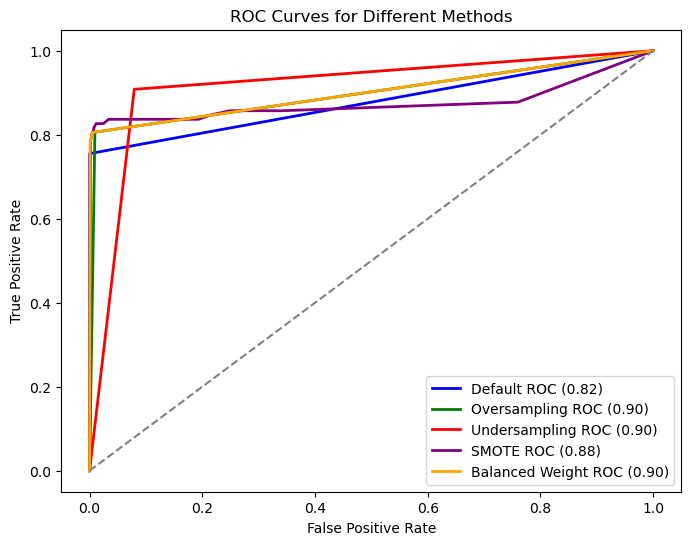

In [36]:
#Your Code Here

fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_default)
fpr_oversample, tpr_oversample, _ = roc_curve(y_test, y_pred_oversample)
fpr_undersample, tpr_undersample, _ = roc_curve(y_test, y_pred_undersample)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_smote)
fpr_balanced, tpr_balanced, _ = roc_curve(y_test, y_pred_balanced)

plt.figure(figsize=(8, 6))
plt.plot(fpr_default, tpr_default, color='blue', lw=2, label=f'Default ROC ({auc_default:.2f})')
plt.plot(fpr_oversample, tpr_oversample, color='green', lw=2, label=f'Oversampling ROC ({auc_oversample:.2f})')
plt.plot(fpr_undersample, tpr_undersample, color='red', lw=2, label=f'Undersampling ROC ({auc_undersample:.2f})')
plt.plot(fpr_smote, tpr_smote, color='purple', lw=2, label=f'SMOTE ROC ({auc_smote:.2f})')
plt.plot(fpr_balanced, tpr_balanced, color='orange', lw=2, label=f'Balanced Weight ROC ({auc_balanced:.2f})')
plt.plot([0.0, 1.0], [0.0, 1.0], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Methods')
plt.legend()
plt.show()

In [37]:
#Comment

# Under the evaluation of ROC, the model with either oversampling/smote/balanced weight, perform better and would be appropriate.
# They all show strong ability in distinguishing between classes with high ROC AUC. SMOTE may be preferable if maximizing recall 
# is a priority. The Default and Undersampling models perform less effectively, as they either ignore the imbalance or lose valuable 
# information by reducing the majority class size.